In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("covid_19_data.csv")

In [6]:
data.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [8]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
6721,6722,03/18/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [9]:
data.shape

(6722, 8)

In [10]:
columns = data.columns

In [11]:
columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [12]:
data.columns= [col.lower() for col in columns]
data.columns

Index(['sno', 'observationdate', 'province/state', 'country/region',
       'last update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [13]:
data.rename(columns={"observationdate":"observation_date",
                    "province/state": "province",
                   "country/region": "country",
                    "last update": "last_update"}, inplace=True)

In [14]:
data

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [15]:
data.country.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [16]:
sorted(data.country.unique())

[' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras

In [17]:
import re
def clean_country(country):
    country = country.lower().strip()
    country = re.sub(r"[^a-z\s]+", "", country)
    country = re.sub(r"mainland china", "china", country)
    return country
# country = country.capitalize()

In [18]:
data["country"] = data["country"].apply(lambda country: clean_country(country))

In [19]:
data["country"].unique()

array(['china', 'hong kong', 'macau', 'taiwan', 'us', 'japan', 'thailand',
       'south korea', 'singapore', 'philippines', 'malaysia', 'vietnam',
       'australia', 'mexico', 'brazil', 'colombia', 'france', 'nepal',
       'canada', 'cambodia', 'sri lanka', 'ivory coast', 'germany',
       'finland', 'united arab emirates', 'india', 'italy', 'uk',
       'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt', 'iran',
       'israel', 'lebanon', 'iraq', 'oman', 'afghanistan', 'bahrain',
       'kuwait', 'austria', 'algeria', 'croatia', 'switzerland',
       'pakistan', 'georgia', 'greece', 'north macedonia', 'norway',
       'romania', 'denmark', 'estonia', 'netherlands', 'san marino',
       'azerbaijan', 'belarus', 'iceland', 'lithuania', 'new zealand',
       'nigeria', 'north ireland', 'ireland', 'luxembourg', 'monaco',
       'qatar', 'ecuador', 'czech republic', 'armenia',
       'dominican republic', 'indonesia', 'portugal', 'andorra', 'latvia',
       'morocco', 'saudi ara

In [20]:
array = []
for i in data["country"].values:
    i = i.lower().strip()
    i = re.sub(r"[^a-z\s]+", "", i)
    i = re.sub(r"mainland china", "china", i)
    array.append(i)
array

['china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'hong kong',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'macau',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'taiwan',
 'china',
 'china',
 'us',
 'china',
 'china',
 'china',
 'japan',
 'thailand',
 'south korea',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'hong kong',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'macau',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'taiwan',
 'china',
 'china',
 'us',
 'china',
 'china',
 'china',
 'japan',
 'thailand',
 'south korea',
 'singapore',
 'philippines',
 'malaysia',
 'vietnam',
 'australia',
 'mexico',
 'brazil',
 'colombia',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'china',
 'ch

In [21]:
data

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,china,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,china,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,china,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,china,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,china,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,puerto rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,republic of the congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [22]:
def check_monotonic_increasing(arb):
    if np.sum(np.diff(arb)< 0) >0:
        return False
    else:
        return True
def force_monotonic_increasing(arb):
    if np.sum(np.diff(arb)< 0) >0:
        return sorted(arb)
     
    else:
        return arb

In [23]:
group_by= data.groupby(by=["country","observation_date"]).agg({"confirmed": "sum", "deaths": "sum","recovered":"sum"}).sort_values(["country","observation_date"],ascending= [True, True])

In [24]:
group_by

confirmed  deaths  recovered
country     observation_date                              
afghanistan 02/24/2020              1.0     0.0        0.0
            02/25/2020              1.0     0.0        0.0
            02/26/2020              1.0     0.0        0.0
            02/27/2020              1.0     0.0        0.0
            02/28/2020              1.0     0.0        0.0
...                                 ...     ...        ...
vietnam     03/15/2020             56.0     0.0       16.0
            03/16/2020             61.0     0.0       16.0
            03/17/2020             66.0     0.0       16.0
            03/18/2020             75.0     0.0       16.0
zambia      03/18/2020              2.0     0.0        0.0

[3228 rows x 3 columns]

In [25]:
group_country=group_by.reset_index(level = 1, drop = True)

In [26]:
group_country

,confirmed,deaths,recovered
country,,,
afghanistan,1.0,0.0,0.0
afghanistan,1.0,0.0,0.0
afghanistan,1.0,0.0,0.0
afghanistan,1.0,0.0,0.0
afghanistan,1.0,0.0,0.0
...,...,...,...
vietnam,56.0,0.0,16.0
vietnam,61.0,0.0,16.0
vietnam,66.0,0.0,16.0


In [27]:
group_country_score=group_by.reset_index()

In [28]:
group_country_score

,country,observation_date,confirmed,deaths,recovered
0,afghanistan,02/24/2020,1.0,0.0,0.0
1,afghanistan,02/25/2020,1.0,0.0,0.0
2,afghanistan,02/26/2020,1.0,0.0,0.0
3,afghanistan,02/27/2020,1.0,0.0,0.0
4,afghanistan,02/28/2020,1.0,0.0,0.0
...,...,...,...,...,...
3223,vietnam,03/15/2020,56.0,0.0,16.0
3224,vietnam,03/16/2020,61.0,0.0,16.0
3225,vietnam,03/17/2020,66.0,0.0,16.0
3226,vietnam,03/18/2020,75.0,0.0,16.0


In [29]:
def check_monotonic_increasing(arb):
    if np.sum(np.diff(arb)< 0) >0:
        return False
    else:
        return True
def force_monotonic_increasing(arb):
    if np.sum(np.diff(arb)< 0) >0:
        return sorted(arb)
     
    else:
        return arb

In [30]:
matrix = group_country_score.groupby(by=["country"]).transform(lambda arb:  check_monotonic_increasing(arb))

In [31]:
matrix

,confirmed,deaths,recovered
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
3223,True,True,True
3224,True,True,True
3225,True,True,True
3226,True,True,True


In [32]:
matrix_ = group_country_score.groupby(by=["country"]).transform(lambda arb:  force_monotonic_increasing(arb))

In [33]:
matrix_

,confirmed,deaths,recovered
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
3223,56.0,0.0,16.0
3224,61.0,0.0,16.0
3225,66.0,0.0,16.0
3226,75.0,0.0,16.0


In [34]:
matrix = matrix.apply(lambda a: a["confirmed"] and a["deaths"] and a["recovered"], axis = 1)

In [35]:
matrix

0       True
1       True
2       True
3       True
4       True
        ... 
3223    True
3224    True
3225    True
3226    True
3227    True
Length: 3228, dtype: bool

In [36]:
non_matrix_increase = group_country_score.iloc[np.where(matrix==False)]

In [37]:
non_matrix_increase

,country,observation_date,confirmed,deaths,recovered
57,andorra,03/02/2020,1.0,0.0,0.0
58,andorra,03/03/2020,1.0,0.0,0.0
59,andorra,03/04/2020,1.0,0.0,0.0
60,andorra,03/05/2020,1.0,0.0,0.0
61,andorra,03/06/2020,1.0,0.0,0.0
...,...,...,...,...,...
2633,south korea,03/16/2020,8236.0,75.0,1137.0
2634,south korea,03/17/2020,8320.0,81.0,1407.0
2635,south korea,03/18/2020,8413.0,84.0,1540.0
2939,the gambia,03/17/2020,1.0,0.0,0.0


In [38]:
non_matrix_increase.country.unique()

array(['andorra', 'australia', 'austria', 'azerbaijan', 'bahrain',
       'egypt', 'guam', 'guernsey', 'hong kong', 'iceland', 'iraq',
       'italy', 'japan', 'jersey', 'lebanon', 'montenegro',
       'occupied palestinian territory', 'others', 'puerto rico',
       'republic of the congo', 'russia', 'saint barthelemy',
       'south korea', 'the gambia'], dtype=object)

In [39]:
group_country_score

,country,observation_date,confirmed,deaths,recovered
0,afghanistan,02/24/2020,1.0,0.0,0.0
1,afghanistan,02/25/2020,1.0,0.0,0.0
2,afghanistan,02/26/2020,1.0,0.0,0.0
3,afghanistan,02/27/2020,1.0,0.0,0.0
4,afghanistan,02/28/2020,1.0,0.0,0.0
...,...,...,...,...,...
3223,vietnam,03/15/2020,56.0,0.0,16.0
3224,vietnam,03/16/2020,61.0,0.0,16.0
3225,vietnam,03/17/2020,66.0,0.0,16.0
3226,vietnam,03/18/2020,75.0,0.0,16.0


In [40]:
matrix = group_country_score.groupby(by=["country"]).transform(lambda arb:  force_monotonic_increasing(arb))

In [41]:
matrix

,confirmed,deaths,recovered
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
3223,56.0,0.0,16.0
3224,61.0,0.0,16.0
3225,66.0,0.0,16.0
3226,75.0,0.0,16.0


In [42]:
group_country_score[matrix.columns] = matrix.values

In [43]:
group_country_score

,country,observation_date,confirmed,deaths,recovered
0,afghanistan,02/24/2020,1.0,0.0,0.0
1,afghanistan,02/25/2020,1.0,0.0,0.0
2,afghanistan,02/26/2020,1.0,0.0,0.0
3,afghanistan,02/27/2020,1.0,0.0,0.0
4,afghanistan,02/28/2020,1.0,0.0,0.0
...,...,...,...,...,...
3223,vietnam,03/15/2020,56.0,0.0,16.0
3224,vietnam,03/16/2020,61.0,0.0,16.0
3225,vietnam,03/17/2020,66.0,0.0,16.0
3226,vietnam,03/18/2020,75.0,0.0,16.0


In [44]:
matrix = group_country_score.groupby(by=["country"]).transform(lambda arb:  check_monotonic_increasing(arb))

In [45]:
matrix = matrix.apply(lambda a: a["confirmed"] and a["deaths"] and a["recovered"], axis = 1)

In [46]:
non_matrix_increase = group_country_score.iloc[np.where(matrix==False)]

In [47]:
print(non_matrix_increase.country.unique())

[]


In [48]:
group_country_score[group_country_score.columns]=group_country_score.values

In [49]:
group_country_score

,country,observation_date,confirmed,deaths,recovered
0,afghanistan,02/24/2020,1.0,0.0,0.0
1,afghanistan,02/25/2020,1.0,0.0,0.0
2,afghanistan,02/26/2020,1.0,0.0,0.0
3,afghanistan,02/27/2020,1.0,0.0,0.0
4,afghanistan,02/28/2020,1.0,0.0,0.0
...,...,...,...,...,...
3223,vietnam,03/15/2020,56.0,0.0,16.0
3224,vietnam,03/16/2020,61.0,0.0,16.0
3225,vietnam,03/17/2020,66.0,0.0,16.0
3226,vietnam,03/18/2020,75.0,0.0,16.0


In [50]:
country_scores=group_country_score.groupby(by=["country"]).agg({"confirmed": "sum", "deaths": "sum","recovered":"sum"})
country_scores["Recovered_rate"]= country_scores["recovered"] / country_scores["confirmed"]
country_scores["Mortality_rate"]= country_scores["deaths"] / country_scores["confirmed"]

In [51]:
country_scores

,confirmed,deaths,recovered,Recovered_rate,Mortality_rate
country,,,,,
afghanistan,139.0,0.0,3.0,0.021583,0.000000
albania,325.0,9.0,0.0,0.000000,0.027692
algeria,474.0,25.0,76.0,0.160338,0.052743
andorra,94.0,0.0,6.0,0.063830,0.000000
antigua and barbuda,6.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...
uzbekistan,32.0,0.0,0.0,0.000000,0.000000
vatican city,4.0,0.0,0.0,0.000000,0.000000
venezuela,98.0,0.0,0.0,0.000000,0.000000


In [52]:
recovery_df= country_scores.loc[country_scores["confirmed"] > 10000, ["Recovered_rate"]].sort_values(by=["Recovered_rate"], ascending = False)

In [53]:
recovery_df

,Recovered_rate
country,
china,0.457273
iran,0.291561
japan,0.154005
others,0.127669
italy,0.092225
spain,0.067748
south korea,0.053978
uk,0.039089
germany,0.014300


In [54]:
recovery_df1= country_scores.loc[country_scores["confirmed"] > 10000, ["Mortality_rate"]].sort_values(by=["Mortality_rate"], ascending = False)

In [55]:
recovery_df1

,Mortality_rate
country,
italy,0.068141
iran,0.047509
spain,0.035815
china,0.033017
japan,0.022409
uk,0.022195
us,0.020081
france,0.019368
netherlands,0.017921


<AxesSubplot:xlabel='country', ylabel='Recovered_rate'>

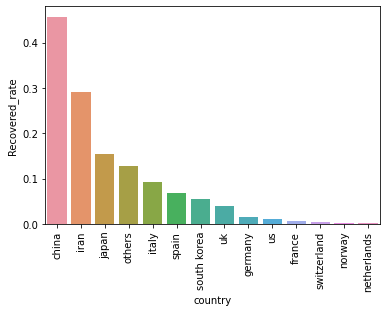

In [61]:
plt.xticks(rotation=90)
sns.barplot(x='country', y='Recovered_rate', data=recovery_df.reset_index())

<AxesSubplot:xlabel='country', ylabel='Mortality_rate'>

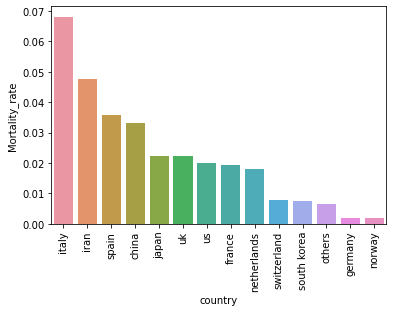

In [62]:
plt.xticks(rotation=90)
sns.barplot(x= "country", y="Mortality_rate", data=recovery_df1.reset_index())

In [64]:
group_country_score["Check_sum"]= group_country_score.apply(lambda a: True if a["confirmed"] >= (a["recovered"]+a["deaths"]) else False, axis = 1)

In [65]:
group_country_score

,country,observation_date,confirmed,deaths,recovered,Check_sum
0,afghanistan,02/24/2020,1.0,0.0,0.0,True
1,afghanistan,02/25/2020,1.0,0.0,0.0,True
2,afghanistan,02/26/2020,1.0,0.0,0.0,True
3,afghanistan,02/27/2020,1.0,0.0,0.0,True
4,afghanistan,02/28/2020,1.0,0.0,0.0,True
...,...,...,...,...,...,...
3223,vietnam,03/15/2020,56.0,0.0,16.0,True
3224,vietnam,03/16/2020,61.0,0.0,16.0,True
3225,vietnam,03/17/2020,66.0,0.0,16.0,True
3226,vietnam,03/18/2020,75.0,0.0,16.0,True


In [66]:
group_country_score[group_country_score["Check_sum"]== False]

,country,observation_date,confirmed,deaths,recovered,Check_sum


In [67]:
group_country_score.drop(columns="Check_sum", inplace=True)

In [72]:
from datetime import datetime

In [88]:
starting_time = '02/10/2020'
group_country_score['days_since'] = pd.to_datetime(group_country_score['observation_date']) - datetime.strptime(starting_time, "%m/%d/%Y")

In [89]:
group_country_score.head()

,country,observation_date,confirmed,deaths,recovered,days_since
0,afghanistan,02/24/2020,1.0,0.0,0.0,14 days
1,afghanistan,02/25/2020,1.0,0.0,0.0,15 days
2,afghanistan,02/26/2020,1.0,0.0,0.0,16 days
3,afghanistan,02/27/2020,1.0,0.0,0.0,17 days
4,afghanistan,02/28/2020,1.0,0.0,0.0,18 days


In [100]:
group_country_score['days_since_numeric'] = pd.to_numeric(group_country_score["days_since"])   

In [101]:
group_country_score.groupby(by=["country"]).transform(lambda arb:  check_monotonic_increasing(arb))

,confirmed,deaths,recovered,days_since_numeric
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
3223,True,True,True,True
3224,True,True,True,True
3225,True,True,True,True
3226,True,True,True,True
